<a href="https://colab.research.google.com/github/9-coding/PyTorch/blob/main/16_custom_model_with_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

In [2]:
for c in [torch, np]:
  print(c.__version__)

2.2.1+cu121
1.25.2


In [3]:
!pip install --quiet torchvision
!pip install --quiet torchsummary

In [4]:
from torch.nn import Module, init, Linear, Parameter, MSELoss, ReLU
from torch import optim
import matplotlib.pyplot as plt
import torchvision
import torchsummary

# Data 생성부
- input
- output: x (tensor), y (tensor) = y_ideal + noise

In [5]:
def gen_xy():
  x = np.linspace(-10, 10, 100)
  y_ideal = 1.8 * x + 32.
  y = y_ideal + 8. * np.random.randn((100))

  return x, y, y_ideal

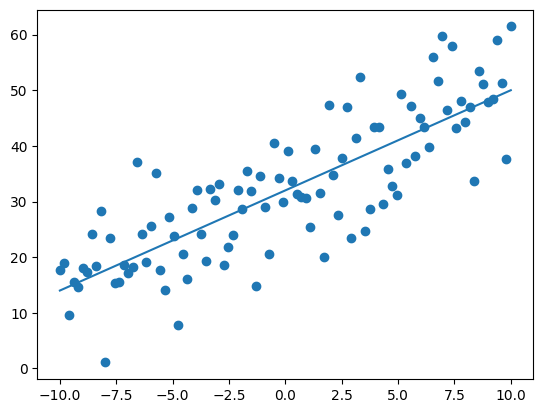

In [6]:
x, y, y_ideal = gen_xy()

plt.plot(x, y_ideal)
plt.scatter(x, y)

### tensor로 변환 (+shape)

In [7]:
x = torch.tensor(x).float()
y = torch.tensor(y).float()
x = x.reshape(-1,1)
y = y.reshape(-1,1)

print(x.shape, type(x))
print(y.shape, type(y))

torch.Size([100, 1]) <class 'torch.Tensor'>
torch.Size([100, 1]) <class 'torch.Tensor'>


# Model

In [8]:
class DsANN(Module):
  def __init__(self,
               n_in_f, # input vector의 차원 수
               n_out_f # output vector의 차원 수
               ):
    super().__init__()

    self.l0 = Linear(n_in_f, 32)
    self.relu0 = ReLU()
    self.l1 = Linear(32, 32)
    self.relu1 = ReLU()
    self.l2 = Linear(32, n_out_f)

    with torch.no_grad():
      init.constant_(self.l0.bias, 0.)
      init.xavier_uniform(self.l0.weight)

  def forward(self, x):
    x = self.l0(x)
    x = self.relu0(x)
    x = self.l1(x)
    x = self.relu1(x)
    y = self.l2(x)
    return y

## torch.nn.init 모듈
ANN을 구현할 때, 각 layer의 weight 와 bias를 초기화하는 방법을 제공함.

- 초기화는 ANN의 수렴 속도 및 학습 안정화에 매우 큰 영향을 줌.
- torch.nn.init는 일반적으로 사용되는 다양한 초기화 방법들이 구현되어 있음.

### `.uniform_(tensor, a=0., b=1.)`
- 지정된 parameters를 uniform distance로 초기화
- a와 b는 값의 범위를 지정하는데 사용됨: [a,b)

### `.normal_(tensor, mean=0., std=1.)`
- normal distribution으로 초기화.

### `.constant_(tensor, val=0.)`
- val 에 지정된 상수값으로 초기화.

### `.ones_() and .zeros_()`
- 0과 1로 초기화.

In [9]:
model = DsANN(1,1)

for idx, c in enumerate(model.named_parameters()):
  print(idx, c)
print()

for idx, c in enumerate(model.parameters()):
  print(idx, c)

0 ('l0.weight', Parameter containing:
tensor([[ 0.1051],
        [-0.0097],
        [-0.0755],
        [ 0.3240],
        [ 0.2826],
        [ 0.0219],
        [-0.0600],
        [-0.1762],
        [ 0.1653],
        [ 0.0166],
        [ 0.1777],
        [ 0.1782],
        [ 0.3407],
        [ 0.0620],
        [ 0.3076],
        [-0.2269],
        [ 0.1553],
        [ 0.4050],
        [ 0.0401],
        [ 0.2016],
        [-0.3703],
        [-0.0008],
        [-0.3979],
        [-0.0375],
        [-0.3327],
        [-0.2652],
        [-0.2867],
        [-0.1336],
        [ 0.1722],
        [-0.2460],
        [-0.1163],
        [-0.1040]], requires_grad=True))
1 ('l0.bias', Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True))
2 ('l1.weight', Parameter containing:
tensor([[-0.0182,  0.1607,  0.1218,  ..., -0.0737, -0.0265,  0.0848],
        [ 0.0347, -0.0

<ipython-input-8-c99a1fa6031d>:16: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  init.xavier_uniform(self.l0.weight)


In [10]:
for idx, cl in enumerate(model.named_children()): # cl: child layer
  print(idx, cl)
print()

for idx, cl in enumerate(model.children()): # cl: child layer
  print(idx, cl)

0 ('l0', Linear(in_features=1, out_features=32, bias=True))
1 ('relu0', ReLU())
2 ('l1', Linear(in_features=32, out_features=32, bias=True))
3 ('relu1', ReLU())
4 ('l2', Linear(in_features=32, out_features=1, bias=True))

0 Linear(in_features=1, out_features=32, bias=True)
1 ReLU()
2 Linear(in_features=32, out_features=32, bias=True)
3 ReLU()
4 Linear(in_features=32, out_features=1, bias=True)


In [11]:
for idx, modu in enumerate(model.named_modules()):
  print(idx, modu)
print()

for idx, modu in enumerate(model.modules()):
  print(idx, modu)

0 ('', DsANN(
  (l0): Linear(in_features=1, out_features=32, bias=True)
  (relu0): ReLU()
  (l1): Linear(in_features=32, out_features=32, bias=True)
  (relu1): ReLU()
  (l2): Linear(in_features=32, out_features=1, bias=True)
))
1 ('l0', Linear(in_features=1, out_features=32, bias=True))
2 ('relu0', ReLU())
3 ('l1', Linear(in_features=32, out_features=32, bias=True))
4 ('relu1', ReLU())
5 ('l2', Linear(in_features=32, out_features=1, bias=True))

0 DsANN(
  (l0): Linear(in_features=1, out_features=32, bias=True)
  (relu0): ReLU()
  (l1): Linear(in_features=32, out_features=32, bias=True)
  (relu1): ReLU()
  (l2): Linear(in_features=32, out_features=1, bias=True)
)
1 Linear(in_features=1, out_features=32, bias=True)
2 ReLU()
3 Linear(in_features=32, out_features=32, bias=True)
4 ReLU()
5 Linear(in_features=32, out_features=1, bias=True)


In [12]:
pred = model(x)
pred

tensor([[-0.6904],
        [-0.6747],
        [-0.6590],
        [-0.6432],
        [-0.6275],
        [-0.6117],
        [-0.5960],
        [-0.5802],
        [-0.5645],
        [-0.5487],
        [-0.5330],
        [-0.5173],
        [-0.5015],
        [-0.4858],
        [-0.4701],
        [-0.4543],
        [-0.4386],
        [-0.4229],
        [-0.4071],
        [-0.3914],
        [-0.3757],
        [-0.3599],
        [-0.3442],
        [-0.3285],
        [-0.3127],
        [-0.2970],
        [-0.2813],
        [-0.2655],
        [-0.2497],
        [-0.2339],
        [-0.2181],
        [-0.2023],
        [-0.1866],
        [-0.1709],
        [-0.1551],
        [-0.1394],
        [-0.1236],
        [-0.1079],
        [-0.0922],
        [-0.0766],
        [-0.0617],
        [-0.0464],
        [-0.0328],
        [-0.0191],
        [-0.0038],
        [ 0.0124],
        [ 0.0298],
        [ 0.0497],
        [ 0.0699],
        [ 0.0960],
        [ 0.1144],
        [ 0.1242],
        [ 0.

# Loss

In [13]:
loss_func = MSELoss()

l = loss_func(pred, y)
l

tensor(1205.2950, grad_fn=<MseLossBackward0>)

# Training Loop

In [14]:
def training_loop(
    x, y,
    model,
    lr,
    n_epochs,
):

  model.train()
  # model.eval()

  optimizer = optim.SGD(
    model.parameters(),
    lr = lr,
  )

  print(n_epochs)


  for epoch in range(n_epochs):
    pred = model(x)
    l = loss_func(pred, y)

    if torch.isinf(l).any(): # 무한대로 발산하면
      print('Error: diverge!')
      break

    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 1000 == 0:
      print(f'Epoch {epoch}: Loss {float(l):0.4f}')

  return model

# Train

In [15]:
model = DsANN(1,1)
model = training_loop(
    x, y,
    model,
    1e-3,
    7000,
)

7000
Epoch 0: Loss 1178.9258


<ipython-input-8-c99a1fa6031d>:16: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  init.xavier_uniform(self.l0.weight)


Epoch 1000: Loss 54.2804
Epoch 2000: Loss 53.4521
Epoch 3000: Loss 53.2175
Epoch 4000: Loss 53.0282
Epoch 5000: Loss 53.0039
Epoch 6000: Loss 53.0447


# Evaluation

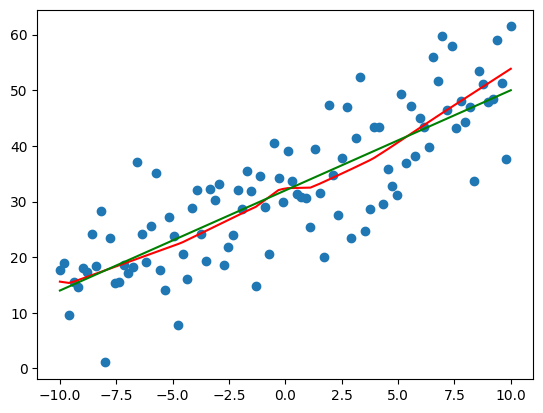

In [17]:
pred = model(x)
plt.scatter(x.detach().numpy(),y.detach().numpy())
plt.plot(x.detach().numpy(), pred.detach().numpy(), color='r')
plt.plot(x.detach().numpy(), y_ideal, color='g')

In [ ]:
from torchsummary import summary

summary(model, (1,))